<a name='toc'></a>
#<font color=#F46767><b> 💣 Exploring Terror in Europe</b> (2000 - 2020) 🔥</font>

> _"The GTD--Global Terrorism Database-- defines a terrorist attack as the threatened or actual use of illegal force and violence by a nonstate actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."_

<br>

## &#9889; _General_<br>

  - <font color='darkturquoise'>Scope</font>:
  Analyze terrorist incidents in Europe from January 1, 2000 through December 31, 2020 using the GTD dataset.

  - <font color='darkturquoise'>Objective</font>:
    - `Primary Obj-0`: _"How did the nature, lethality, and modus operandi of terrorist activity evolve across Europe from 2000 to 2020?"_
    - `Secondary Obj-1`: _"Which perpetrator groups changed their preferred attack types or target profiles over the two decades, and when did those shifts occur?"_
    - `Secondary Obj-2`: _"What country-to-country “spill-over” patterns exist?"_


<br>

##<img src="https://img.icons8.com/?size=100&id=yTvVS6whPDpp&format=png&color=000000" width="30" height="30"/> Main File Structure

&emsp;&emsp;
<img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> gtd_project/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> source_files/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> notebooks/<br>
&emsp;&emsp;&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_part1_etl.ipynb<br>
&emsp;&emsp;&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_part2_obj0.ipynb<br>
&emsp;&emsp;&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_part2_obj1.ipynb<br>
&emsp;&emsp;&emsp;&emsp;
&#x2514;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_part2_obj2.ipynb<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_util.py/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> etl_outputs/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> images/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> processed_data/<br>
&emsp;&emsp;
&#x2514;&#x2500; <img src="https://img.icons8.com/?size=100&id=VUckOuTyLQ7W&format=png&color=19B1FC" width='25' height='25'/> README.md<br>
<br>

###<img src="https://img.icons8.com/?size=100&id=XOQ8AO4LZthX&format=png&color=000000" width="30" height="30"/>References
1. START (National Consortium for the Study of Terrorism and Responses to Terrorism). (2022). Global Terrorism Database, 1970 - 2020. <a href="https://www.start.umd.edu/gtd">Dataset</a>&emsp;<a href="https://www.start.umd.edu/sites/default/files/2024-10/Codebook.pdf">Codebook</a>&emsp;<a href="https://www.start.umd.edu/gtd-terms">TermsOfUse</a>
2. Icons by [icons8](https://icons8.com)

In [ ]:
# general libs
import warnings
import numpy as np
import pandas as pd
from datetime import datetime
from collections import defaultdict

# graphics libs
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# defining the project directory to work with along with geodata's source file

PROJECT_PATH = '/content/drive/MyDrive/pf_pjs/gtd_project'
DATA_PATH = '/etl_outputs/gtd_final.pkl'

%cd $PROJECT_PATH

/content/drive/MyDrive/pf_pjs/gtd_project


In [ ]:
# pandas global setting
pd.options.display.max_columns = None

# ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
gtd = pd.read_pickle(DATA_PATH)

In [ ]:
gtd.columns

Index(['id', 'date', 'five_year', 'quarter', 'year', 'month', 'month_name',
       'day', 'region', 'country', 'alpha2', 'alpha3', 'province_state',
       'city', 'lat', 'lon', 'is_success', 'is_suicide', 'is_property_damaged',
       'terr_group', 'is_claimed', 'attack_type', 'weapon_type',
       'weapon_subtype', 'target_type', 'target_subtype', 'target_nationality',
       'fatalities_total', 'fatalities_terrorists', 'wounded_total',
       'wounded_terrorists', 'is_hostage', 'hostages_total',
       'hostage_duration', 'is_ransom'],
      dtype='object')

In [ ]:
# an adjustment so the geodata align with the GTD dataframe
gtd['alpha3'] = gtd['alpha3'].cat.remove_categories('XKX')
gtd['alpha3'] = gtd['alpha3'].cat.add_categories(['KOS'])
gtd.loc[gtd.alpha3.isna(), 'alpha3'] = 'KOS'

<a name='eda'></a>
##<img src="https://img.icons8.com/?size=100&id=21144&format=png&color=000000" width="25" height="25"/> <font color=orange><b>Analysis</b></font>

### <font color='skyblue'>**Tactical & Target Adaptation Analysis** (Obj-1)</font>

Here we will:
- Select the top 5 terrorist groups (by activity count).

- Plot their attack type trends over time.

- Highlight tactical shifts (e.g., bombings $\rightarrow$ armed assaults)

- Plot their target type trends over time.

- Highlight target shifts

In [ ]:
# how many terrorist groups are listed in our GTD?
gtd['terr_group'].nunique()

353

#### <font color='pink'>Tactical Adaptation over Time</font>

In [ ]:
# what's top-3 terrorist groups?
top_groups = (gtd['terr_group']
              .value_counts()
              .head(6))

top_n = top_groups.index.tolist()[1:] # excluding UKN from the top5
df_top = gtd[gtd['terr_group'].isin(top_n) & (gtd['attack_type'] != 'UKN')].copy()

# remove unused categories
df_top['terr_group'] = df_top['terr_group'].cat.remove_unused_categories()
df_top['attack_type'] = df_top['attack_type'].cat.remove_unused_categories()

print(df_top['terr_group'].value_counts())

terr_group
Kurdistan Workers' Party (PKK)         1276
Donetsk People's Republic               601
Chechen Rebels                          295
Basque Fatherland and Freedom (ETA)     236
Luhansk People's Republic               206
Name: count, dtype: int64


In [ ]:
# attack count per terrorist group in a 5year span
counts = (df_top
          .groupby(['five_year', 'terr_group', 'attack_type'])
          .size()
          .reset_index(name='count')
          )

# compute total attacks per group-5year
totals = (counts
          .groupby(['five_year', 'terr_group'])['count']
          .sum()
          .reset_index(name='total')
          )

# merge attacks and compute share
df_share = counts.merge(totals, on=['five_year', 'terr_group'])
df_share['share'] = df_share['count'] / df_share['total']

In [ ]:
def plot_stacked_tactics(group_name, g_short=None):
  '''
  USAGE: Plots a stacked bar chart of tactic share over time for a given group
  TODO: 1. filter the data according to a terrorist group
        2. summarize the data per attack type
        3. plot the data
  '''

  df_g = (df_share[(df_share['terr_group'] == group_name) ])
  pivot = df_g.pivot(index='five_year', columns='attack_type', values='share').fillna(0)

  fig, ax = plt.subplots()
  pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10', ax=ax)

  ax.set_title(f'{group_name} – Tactical Mix Over Time\n', fontsize=14, weight='bold')
  ax.set_ylabel('Share of Attack Types\n', fontsize=10, weight='bold')
  ax.set_xlabel('')
  ax.set_yticks(np.arange(0, 1.1, 0.1))
  ax.set_xlabel('')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  ax.set_ylim(0, 1)

  ax.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left',
            frameon=False, title_fontproperties={'weight':'bold'})

  ax.grid(axis='y', linestyle='--', alpha=0.4)

  fig.set_figheight(4)
  sns.despine(left=False, bottom=False)
  plt.tight_layout()
  # plt.savefig(f'images/tactical_adapt_obj1/{g_short}_tact_adapt.png')
  plt.show()


def tactical_adaptation(group_name, g_short=None):
  # collect 5-year activity of a terrorist group
  att_adapt = (totals.loc[totals.terr_group == group_name]
              .sort_values(['five_year', 'terr_group'], ascending=True)
              .set_index('five_year')
              )

  print(att_adapt)
  print('\n\n')

  plot_stacked_tactics(group_name, g_short)

                               terr_group  total
five_year                                       
2000-2005  Kurdistan Workers' Party (PKK)     41
2006-2010  Kurdistan Workers' Party (PKK)     71
2011-2015  Kurdistan Workers' Party (PKK)    573
2016-2020  Kurdistan Workers' Party (PKK)    591





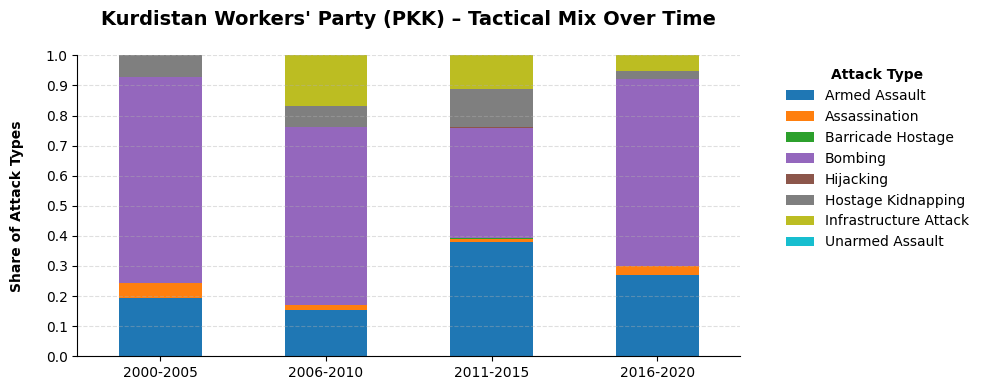

In [ ]:
tactical_adaptation("Kurdistan Workers' Party (PKK)", 'PKK')

<font color='orange'><b>Observations</b></font>

- The PKK conducted a total of **41 attacks** from 2000 to 2005. This number rose to **71** from 2006 to 2010, then surged to **573** from 2011 to 2015, and reached **591** from 2016 to 2020.

- The early attacks were primarily characterized by **bombings**, along with some **armed assaults** and occasional **infrastructure attacks**.

- From 2011 onward, **armed assaults** increased significantly, and there was an expansion in **tactical diversity**, which included **kidnappings** and ongoing **sabotage**.

<br>

<font color='orange'><b>Insights</b></font>

- The PKK underwent a **clear operational transformation**, shifting from bomb-heavy attacks to a **balanced mix of armed assaults and bombings**.

- The group's rise in activity post-2010 aligns with regional instability and shows **strategic adaptation to conflict zones**.

- The use of **infrastructure sabotage and kidnappings** signals a broader campaign of **disruption and coercion**.

- The group became more **aggressive and tactically flexible**, maintaining a high tempo while diversifying methods.

- This shows strong **adaptive capacity** and sustained capability despite counterterrorism pressure.



                          terr_group  total
five_year                                  
2000-2005  Donetsk People's Republic      0
2006-2010  Donetsk People's Republic      0
2011-2015  Donetsk People's Republic    570
2016-2020  Donetsk People's Republic     31





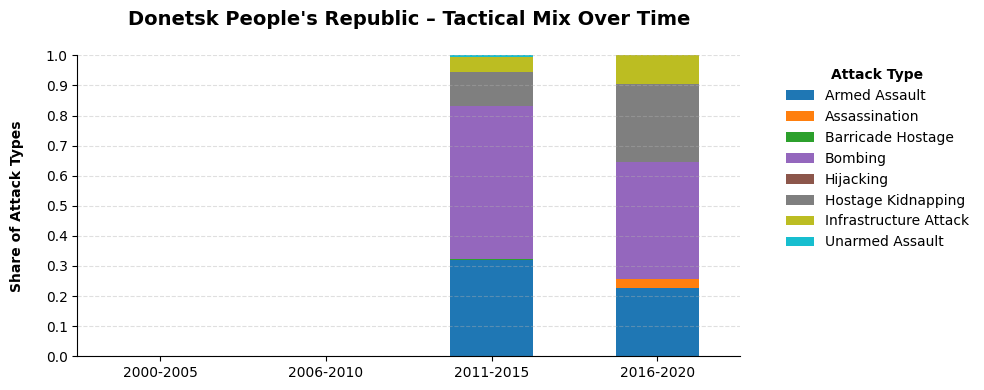

In [ ]:
tactical_adaptation("Donetsk People's Republic", 'Donetsk')

<font color='orange'><b>Observations</b></font>

- No activity was recorded before 2011.

- The group **launched 570 attacks** between 2011-2015, **then dropped to 31** in 2016-2020.

- In the active years, the group used a mix of **bombings**, **armed assaults**, and **hostage kidnappings**, along with a few **assassinations** and **infrastructure attacks**.

- In the later years, **hostage tactics increased**, while bombings and assaults declined.

<br>

<font color='orange'><b>Insights</b></font>

- DPR entered the scene with a **diverse tactical mix**, combining lethal and coercive methods during conflict escalation.

- DPR showed **clear tactical adaptation** by shifting **from kinetic violence** (bombings, armed assaults) **to more coercive tactics** (hostage-taking) in later years.

- The sharp drop in total attacks reflects either **external stabilization**, **integration into military structures**, or **loss of autonomy**.

- The tactical change suggests a **move from battlefield insurgency to political control** at the operative areas.

               terr_group  total
five_year                       
2000-2005  Chechen Rebels    272
2006-2010  Chechen Rebels     20
2011-2015  Chechen Rebels      2
2016-2020  Chechen Rebels      1





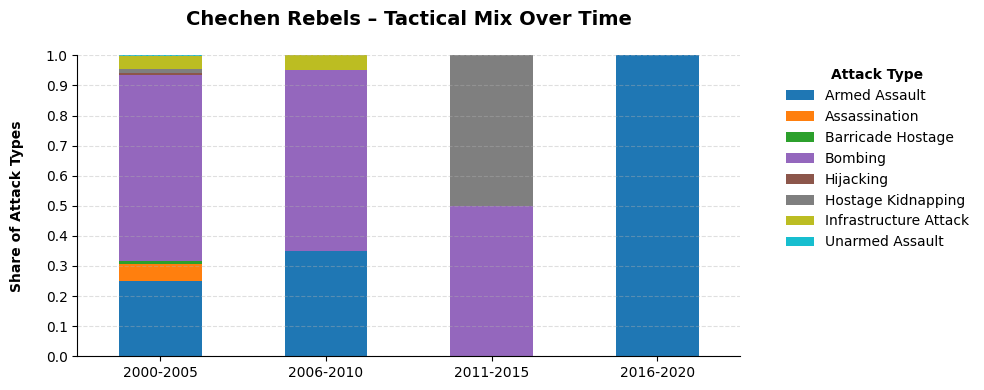

In [ ]:
tactical_adaptation("Chechen Rebels", 'Chechen')

<font color='orange'><b>Observations</b></font>

- There were **272 attacks** between 2000-2005, dropping sharply to **20** in 2006-2010, **2** in 2011-2015, and **1** in 2016-2020.

- In the early years, they used a **mix of bombings**, **armed assaults**, and a small number of **hostage incidents**, **assassinations**, and **infrastructure attacks**.

- From 2006 onward, the volume and variety of attacks declined dramatically.

<br>

<font color='orange'><b>Insights</b></font>

- The Chechen Rebels displayed **moderate tactical diversity** during peak conflict years but showed **no clear adaptation afterward**.

- The shift from a high number of incidents to nearly none reflects a **loss of operational capacity** or absorption into other movements.

- The **absence of new tactics** or significant shifts suggests the group did not evolve strategically.

- The late-period hostage and assault incidents were isolated and likely uncoordinated.

- Overall, this is a group that **faded rather than adapted**, with tactical patterns collapsing alongside volume.

                                    terr_group  total
five_year                                            
2000-2005  Basque Fatherland and Freedom (ETA)    162
2006-2010  Basque Fatherland and Freedom (ETA)     73
2011-2015  Basque Fatherland and Freedom (ETA)      1
2016-2020  Basque Fatherland and Freedom (ETA)      0





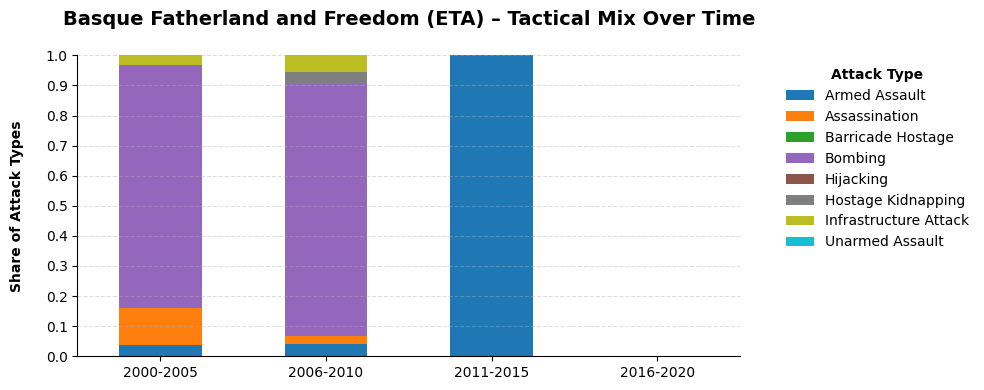

In [ ]:
tactical_adaptation("Basque Fatherland and Freedom (ETA)", 'ETA')

<font color='orange'><b>Observations</b></font>

- ETA recorded **162 attacks** in 2000-2005, followed by **73** in 2006-2010, then just **1** in 2011-2015 and **0** in 2016-2020.

- In the early 2000s, the group relied mainly on **bombings**, with minor use of **assassinations** and **armed assaults**.

- No activity was recorded after 2011, and no tactical diversity appeared in the final years.

<br>

<font color='orange'><b>Insights</b></font>

- ETA's operational pattern shows a clear **decline over time**, both in volume and diversity.

- The group was **tactically consistent** in the early years, focused primarily on bombings.

- The **steep drop in attacks after 2010** suggests a transition from active terrorism to political disengagement.

- There is **no evidence of tactical adaptation**; instead, the group appears to have maintained a fixed strategy until it ceased activity.

- The final single incident may have been isolated or disconnected from broader organizational planning.

                          terr_group  total
five_year                                  
2000-2005  Luhansk People's Republic      0
2006-2010  Luhansk People's Republic      0
2011-2015  Luhansk People's Republic    198
2016-2020  Luhansk People's Republic      8





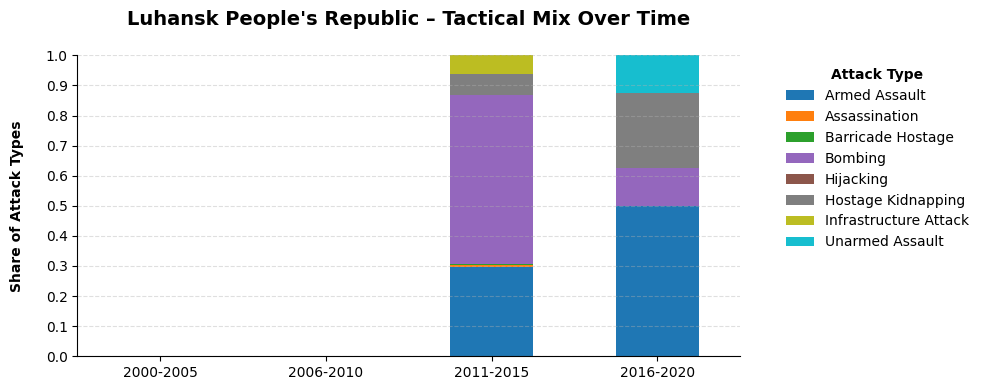

In [ ]:
tactical_adaptation("Luhansk People's Republic", 'Luhansk')

<font color='orange'><b>Observations</b></font>

- LPR had **198 attacks** in 2011-2015 and **8** in 2016-2020. No activity was recorded before 2011.

- During its active phase, it used **bombings**, **armed assaults**, **hostage kidnappings**, and **infrastructure attacks**.

- In the later period, it shifted toward **low-lethality tactics** like **hostage-taking**, **unarmed assaults**, and fewer bombings.

<br>

<font color='orange'><b>Insights</b></font>

- LPR began with a **high-capacity hybrid tactic model**, similar to DPR.

- Its **post-2015 shift to less-lethal, more coercive tactics** indicates a move from open conflict to **population control**.

- The decline in bombing and rise in **non-lethal actions** suggests either **de-escalation** or **strategic repositioning**.

- LPR did not maintain its operational tempo but **adapted tactics** to serve  goals in a lower-conflict environment.

#### <font color='pink'>Tactical Preferences</font>

In [ ]:
'''
Here, we're going to explore the attack preferences per terrorist group
we examined before. UKN attack types are not of our interest at the moment.
For that reason we'll work as follows:
1. We'll find out how many incidents per attack type occurred per terrorist group
2. We'll find the total number of incidents per terrorist group
3. We'll find the share (proportion) of each attack type per terrorist group
    by dividing the counts of each attack type per group by the total number
    of attacks per group
'''
# group and count
group_attack_counts = (df_top
                       .groupby(['terr_group', 'attack_type'])
                       .size()
                       .reset_index(name='count')
                       )


# counting total attacks per group
group_totals = (group_attack_counts
                .groupby('terr_group')['count']
                .sum()
                .reset_index(name='total_attacks')
                )


# merge and calculate proportions
df_group_share = group_attack_counts.merge(group_totals, on='terr_group')

df_group_share['share'] = df_group_share['count'] / df_group_share['total_attacks']


# pivot into matrix format
tactical_matrix = (df_group_share
                   .pivot(index='terr_group', columns='attack_type', values='share')
                   .fillna(0)
                   .round(2)
                   .sort_index()
                   )

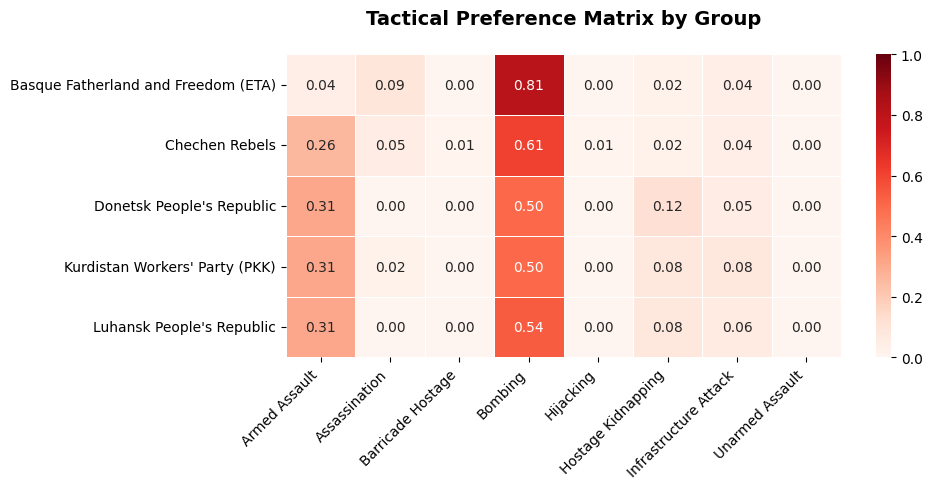

In [ ]:
plt.figure(figsize=(10, 5))

sns.heatmap(tactical_matrix,
            vmax=1,
            annot=True,
            cmap='Reds',
            fmt='.2f',
            linewidths=0.5
            )

plt.title('Tactical Preference Matrix by Group\n', fontsize=14, weight='bold')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
# plt.savefig('images/tactical_adapt_obj1/top5_tactical_preference_matrix.png')
plt.show()

#### <font color='seablue'>Kurdistan Workers' Party (PKK)</font>
&#128269;<font color='orange'><b> Observations</b></font>

- PKK used **bombings** and **armed assaults** 50% and 31%, respectively.

- **Hostage-taking** and **infrastructure attacks** were both used at around 8% each.

- All other tactics, including assassinations and unarmed assault, were negligible or absent.

<br>

&#128161;<font color='orange'><b> Insights</b></font>

- PKK clearly embraced a **hybrid warfare model**, pairing lethal attacks with long-term disruption tactics like sabotage and kidnapping.

- The consistent use of infrastructure attacks reflects a strategy of **economic and logistical disruption**.

- Tactical diversity, while not extreme, is deliberate and shows a **strategic mix of fear, disruption, and control**.

- PKK's high share of both bombings and armed assaults confirms its **long-term insurgent posture** across varied terrain.

---

#### <font color='seablue'>Donetsk People's Republic (DPR)</font>
&#128269;<font color='orange'><b> Observations</b></font>

- DPR split its tactics primarily between **bombings** (50%) and **armed assaults** (31%).

- **Hostage kidnapping** made up 12%, with minor use of **infrastructure attacks** (5%) and **assassinations**.

- No hijackings or unarmed assaults are reported.

<br>

&#128161;<font color='orange'><b> Insights</b></font>

- DPR operated as a **hybrid actor**, using both combat operations and psychological/coercive tactics.

- The high share of hostage-taking, even at this scale, highlights a **broader strategy of civilian control and intimidation**.

- DPR shows strong **tactical flexibility**, with a near-even distribution between kinetic and coercive tactics.

- The balance between these tactics suggests **organized command structure** and **territorial control** rather than sporadic terrorism.

---

#### <font color='seablue'>Chechen Rebels</font>
&#128269;<font color='orange'><b> Observations</b></font>

- **Bombings** made up 61% of all attacks, followed by **armed assaults** at 26%.

- Minor use of **assassinations** (5%), and very limited **hostage**, **infrastructure**, or other tactics.

- Other tactics are practically negligible, with **no hijackings or unarmed assaults**.

<br>

&#128161;<font color='orange'><b> Insights</b></font>

- The Chechen Rebels maintained a **dual approach**: remote bombings and direct combat, typical of insurgencies in active war zones.

- Their tactics show a balance between **high-impact terror** and **military-style operations**.

- The limited use of hostage-taking or sabotage suggests a **focus on high-lethality outcomes** rather than psychological coercion.

- They displayed **moderate tactical diversity**, but no indication of strategic shifts over time.

---

#### <font color='seablue'>Basque Fatherland and Freedom (ETA)</font>
&#128269;<font color='orange'><b> Observations</b></font>

- ETA tactics focused on **bombings**, making up 81% of its recorded tactics.

- Assassination accounted for roughly 9%, and armed assault just 4%.

- The group did not use hostage-taking, infrastructure attacks, or any other method in measurable proportions.

<br>

&#128161;<font color='orange'><b> Insights</b></font>

- ETA's tactical profile was **extremely narrow**, dominated by low-risk bombing campaigns.

- This suggests a strategic focus on **symbolic attacks**; likely aimed at undermining public institutions or infrastructure without sustained combat.

- The absence of armed assaults or hostage tactics reinforces that ETA **avoided direct confrontation**, preferring sabotage and political messaging through terror.

- Their operational rigidity reflects a **lack of adaptation**, likely tied to ideological constraints and urban operating environments.

---

#### <font color='seablue'> Luhansk People's Republic (LPR)</font>
&#128269;<font color='orange'><b> Observations</b></font>

- Tactics are distributed between **bombings** (54%), **armed assaults** (31%), and **hostage-taking/infrastructure sabotage** (each at 6%).

- Other tactics, including assassinations, are not represented.

- The distribution closely resembles DPR and PKK.

<br>

&#128161;<font color='orange'><b> Insights</b></font>

- LPR's shares a **nearly identical tactical signature** with the DPR, reinforcing the idea of **shared doctrine or operational coordination**.

- The group used tactics suited for **territorial control**, especially in conflict-heavy environments.

- Hostage-taking appears as a secondary tool for coercion rather than mass violence.

- The tactical proportions suggest a **planned and consistent operational model**, not reactive or improvised attacks.

#### <font color='pink'>Target Mixture over Time</font>

In [ ]:
df_top2 = df_top.copy()
df_top2 = df_top2[df_top2['target_type'] != 'UKN']
df_top2['target_type'] = df_top2['target_type'].cat.remove_categories('UKN')

# Count of attacks per group, 5year time span, and target type
df_target = (df_top2
             .groupby(['terr_group', 'five_year', 'target_type'])
             .size()
             .reset_index(name='count')
             )


# Normalize to get proportions within each group and time span
df_target['total'] = df_target.groupby(['terr_group', 'five_year'])['count'].transform('sum')
df_target['share'] = df_target['count'] / df_target['total']

In [ ]:
def plot_target_mix(group_name, g_short=None):
  '''
  USAGE: Plots a stacked bar chart of target share over time for a given group
  TODO: 1. filter the data according to a terrorist group
        2. summarize the data per target type
        3. plot the data
  '''

  df_g = df_target[df_target['terr_group'] == group_name]

  pivot = df_g.pivot(index='five_year', columns='target_type', values='share').fillna(0)

  fig, ax = plt.subplots()
  pivot.plot(kind='bar', stacked=True, figsize=(10, 4), colormap='tab20', ax=ax)

  ax.set_title(f'{group_name} – Target Mix Over Time\n', fontsize=14, weight='bold')
  ax.set_ylabel('Proportion of Target Types\n', fontsize=10, weight='bold')
  ax.set_xlabel('')
  ax.set_ylim(0, 1)
  ax.set_yticks(np.arange(0, 1.1, 0.1))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  ax.legend(title='Target Type', bbox_to_anchor=(1.05, 1), loc='upper left',
            frameon=False, title_fontproperties={'weight':'bold'})

  ax.grid(axis='y', linestyle='--', alpha=0.4)
  sns.despine(left=False, bottom=False)
  plt.tight_layout()
  plt.savefig(f'images/tactical_adapt_obj1/{g_short}_target_adapt.png')
  plt.show()

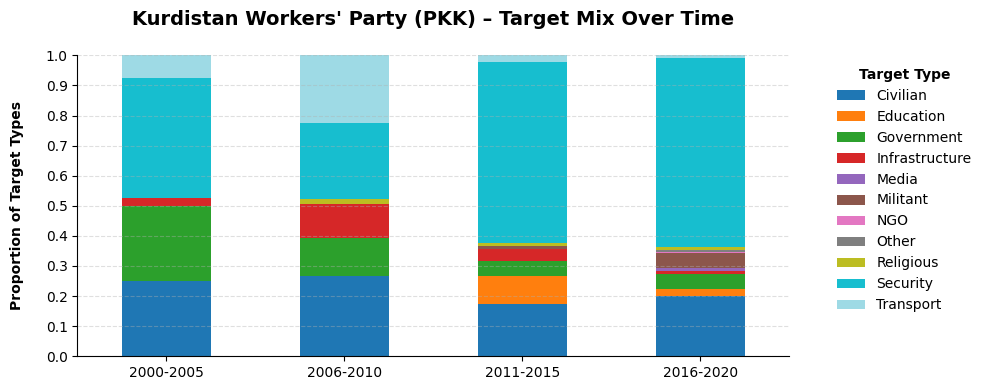

In [ ]:
plot_target_mix("Kurdistan Workers' Party (PKK)", 'PKK')

<font color='orange'><b>Observations</b></font>

- 2000 &ndash; 2005: Diverse targeting — Security, Government, and Civilian were primary. Minor activity against Infrastructure.

- 2006 &ndash; 2010: Continued mix, with added attacks on Transport.

- 2011 &ndash; 2015: Security dominance increased. Education, NGO, and Religious targets appeared in small proportions.

- 2016 &ndash; 2020: Similar pattern, though Civilian targeting increased, and Infrastructure decreased.

<br>

<font color='orange'><b>Insights</b></font>

- PKK maintained a broad and adaptive targeting strategy, hitting state forces and infrastructure early, then gradually moving toward soft and symbolic targets.

- The introduction of Education, NGO, and Religious targets suggests escalation into psychological and ideological arenas.

- Its consistent ability to operate across multiple target types reflects strategic maturity and operational resilience.

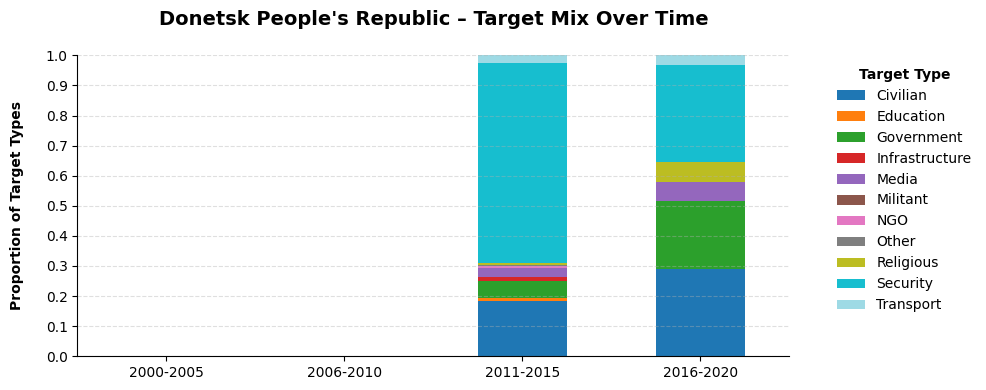

In [ ]:
plot_target_mix("Donetsk People's Republic", 'Donetsk')

<font color='orange'><b>Observations</b></font>

- 2000 &ndash; 2005: No activity

- 2006 &ndash; 2010: No activity

- 2011 &ndash; 2015: Clear dominance of Security targets (~70%). Secondary targets included Civilian, Government, and small fractions of Education, Media, and Transport.

- 2016 &ndash; 2020: Security remained high, but Government and Civilian increased. Media and Religious targets emerged slightly.

<br>

<font color='orange'><b>Insights</b></font>

- DPR began with a classic hybrid warfare focus on Security forces, later expanding into Government and soft targets.

- The rise in Government, Civilian, and symbolic targets (Media/Religious) in 2016 &ndash; 2020 suggests a shift toward coercive and psychological tactics.

- This represents a measured adaptation away from strictly combat operations to broader tools of territorial influence and control.

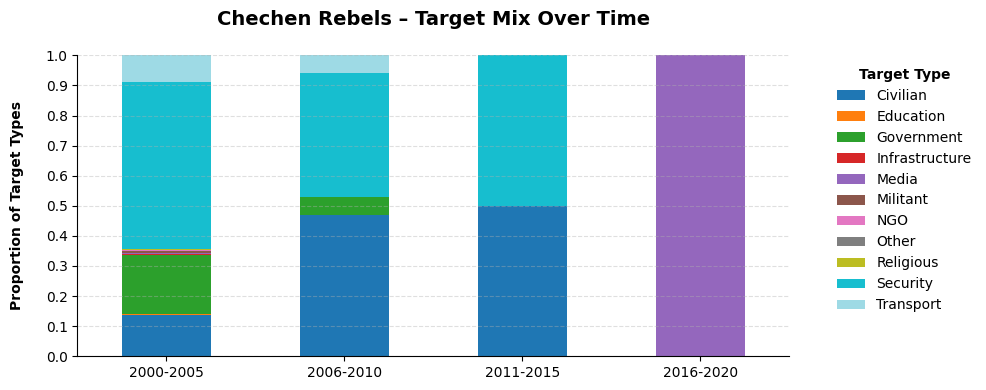

In [ ]:
plot_target_mix("Chechen Rebels", 'Chechen')

<font color='orange'><b>Observations</b></font>

- 2000 &ndash; 2005: Most attacks focused on Security, followed by Government and Civilian targets. There were minor hits on Transport and Infrastructure.

- 2006 &ndash; 2010: Civilians took the lead while Security remained a significant target. Rest of target types stayed in minimal levels.

- 2011 &ndash; 2015: Security and Civilian targets shared equaly proportions.

- 2016 &ndash; 2020: A single incident occurred, targeting Media.

<br>

<font color='orange'><b>Insights</b></font>

- Chechen Rebels maintained a strong and consistent focus on Security forces primary and Civilian targets secondary, reflecting an armed insurgency posture.

- The drop-off of Government targeting after 2005 suggests a shrinking tactical and operational scope.

- The single attack on Media in 2016 &ndash; 2020 may reflect either symbolic messaging or a targeting anomaly.

- No clear adaptation in target profile is observed — instead, the group's targeting contracted along with its activity.

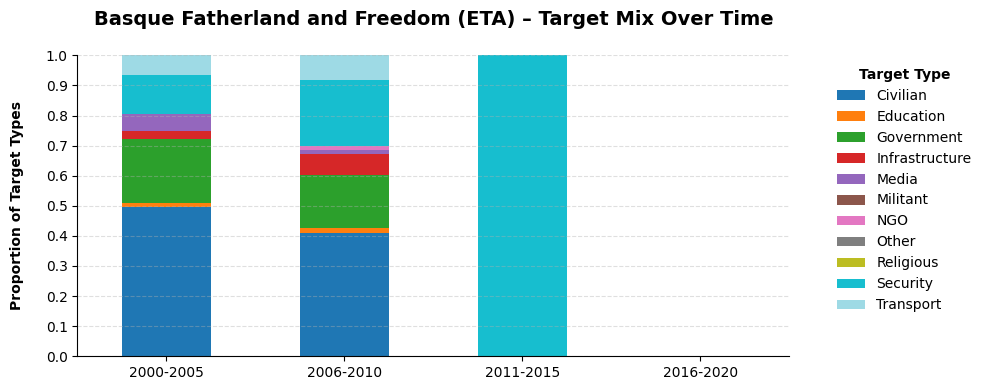

In [ ]:
plot_target_mix("Basque Fatherland and Freedom (ETA)", 'ETA')

<font color='orange'><b>Observations</b></font>

- 2000 &ndash; 2005: Split between Civilian, Government, and Security targets. Minor focus on NGO, Infrastructure, and Media.

- 2006 &ndash; 2010: Similar mix, though Government slightly decreased and Infrastructure increased.

- 2011 &ndash; 2015: Only one attack recorded — targeting Security.

- 2016 &ndash; 2020: No activity.

<br>

<font color='orange'><b>Insights</b></font>

- ETA's target mix reflects a political messaging strategy, aimed at Government institutions and public confidence (via Civilian/Infrastructure).

- The proportional consistency suggests a fixed doctrine, with minor shifts rather than innovation.

- No significant operational adaptation occurred before demobilization. The group gradually faded away without reinventing its targeting approach.

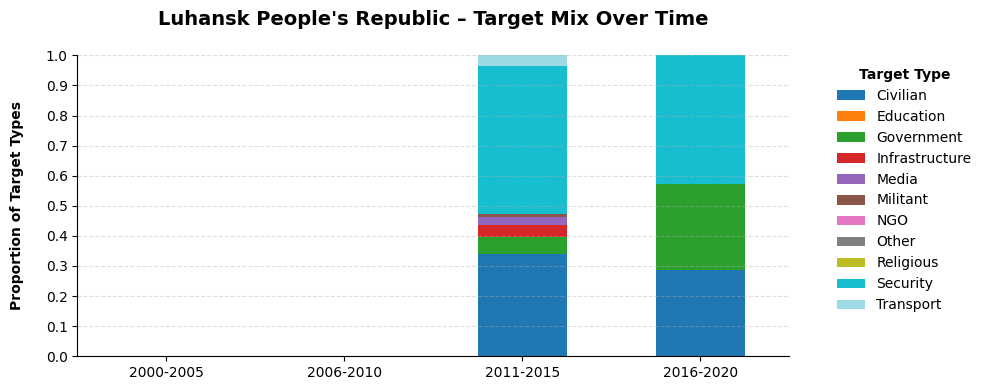

In [ ]:
plot_target_mix("Luhansk People's Republic", 'Luhansk')

<font color='orange'><b>Observations</b></font>

- 2000 &ndash; 2005: No activity.

- 2006 &ndash; 2010: No activity.

- 2011 &ndash; 2015: Targeting was split mainly across Security, Civilian, and Government sectors. Smaller portions hit Infrastructure and Media.

- 2016 &ndash; 2020: Government targeting surged, Civilian remained, and Security slightly declined. No non-state or symbolic targets observed.

<br>

<font color='orange'><b>Insights</b></font>

- LPR demonstrated a shift in emphasis from Security targets (combat-focused) to Government and Civilian targets (coercion-focused). This suggests a transition from open insurgency to population and administration control.

- The group's later profile mirrors DPR but shows a heavier institutional focus.

- Target changes indicate strategic adaptation to post-frontline roles.

<font color='lightgreen'><b>Wrapping-up Obj-1</b></font>

*Among the five groups analyzed, **PKK**, **DPR**, and **LPR** clearly **adapted both their attack methods and target choices** in response to evolving conflict dynamics and strategic goals. In contrast, **ETA and Chechen Rebels** showed **no significant change**, and instead followed static patterns until operational collapse or demobilization.<br>
These findings highlight that **hybrid insurgent actors** (PKK, DPR, LPR) tend to evolve tactically and target-wise over time, especially when involved in prolonged or regionally complex conflicts. In contrast, **ideologically rigid or territorially constrained groups** (ETA, Chechen Rebels) are less likely to adapt.*